Importing the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
crime_data = pd.read_csv('/content/drive/MyDrive/Crime_Data_from_2020_to_Present.csv')

In [4]:
print("Dataset shape:", crime_data.shape)
crime_data.head()

Dataset shape: (1004847, 28)


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [5]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004847 entries, 0 to 1004846
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004847 non-null  int64  
 1   Date Rptd       1004847 non-null  object 
 2   DATE OCC        1004847 non-null  object 
 3   TIME OCC        1004847 non-null  int64  
 4   AREA            1004847 non-null  int64  
 5   AREA NAME       1004847 non-null  object 
 6   Rpt Dist No     1004847 non-null  int64  
 7   Part 1-2        1004847 non-null  int64  
 8   Crm Cd          1004847 non-null  int64  
 9   Crm Cd Desc     1004847 non-null  object 
 10  Mocodes         853256 non-null   object 
 11  Vict Age        1004847 non-null  int64  
 12  Vict Sex        860243 non-null   object 
 13  Vict Descent    860231 non-null   object 
 14  Premis Cd       1004831 non-null  float64
 15  Premis Desc     1004259 non-null  object 
 16  Weapon Used Cd  327193 non-null   fl

In [6]:
crime_data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004847e+06,1.004831e+06,327193.000000,1.004836e+06,69130.000000,2315.000000,64.00000,1.004847e+06,1.004847e+06
mean,2.202171e+08,1.339911e+03,1.069147e+01,1.115607e+03,1.400307e+00,5.001353e+02,2.891905e+01,3.056073e+02,363.944543,4.998958e+02,958.115941,984.022030,991.21875,3.399820e+01,-1.180908e+02
std,1.318835e+07,6.510691e+02,6.110286e+00,6.111622e+02,4.899607e-01,2.052622e+02,2.199224e+01,2.192915e+02,123.741225,2.050627e+02,110.359911,52.340476,27.06985,1.610827e+00,5.582785e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02
25%,2.106168e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02
50%,2.209158e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02
75%,2.311101e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02
max,2.521040e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00


In [7]:
crime_data.isnull().sum()

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


In [8]:
# Check null values
missing_values = crime_data.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(crime_data)) * 100

# Display columns with missing data
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing': missing_percent
})
missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percent Missing
Crm Cd 4,1004783,99.993631
Crm Cd 3,1002532,99.769617
Crm Cd 2,935717,93.120346
Cross Street,850626,84.652290
Weapon Used Cd,677654,67.438525
Weapon Desc,677654,67.438525
Mocodes,151591,15.085978
Vict Descent,144616,14.391843
Vict Sex,144604,14.390649
Premis Desc,588,0.058516


In [9]:
 # Convert DATE OCC to datetime
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Create new time-based features
crime_data['Year'] = crime_data['DATE OCC'].dt.year
crime_data['Month'] = crime_data['DATE OCC'].dt.month
crime_data['Day'] = crime_data['DATE OCC'].dt.day

# Covering time_occ to HH:MM format
crime_data['TIME OCC'] = crime_data['TIME OCC'].astype(str).str.zfill(4)
crime_data['TIME OCC'] = crime_data['TIME OCC'].str[:2] + ':' + crime_data['TIME OCC'].str[2:]




In [10]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year,Month,Day
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,21:30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020,3,1
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,18:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020,2,8
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,17:00,3,Southwest,356,1,480,BIKE - STOLEN,...,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020,11,4
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,20:37,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020,3,10
4,200412582,09/09/2020 12:00:00 AM,2020-09-09,06:30,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,2020,9,9


In [11]:
# Weekday from date (0 = Monday, 6 = Sunday)
crime_data['Weekday'] = crime_data['DATE OCC'].dt.day_name()

# Map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

crime_data['Season'] = crime_data['Month'].apply(get_season)

In [12]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year,Month,Day,Weekday,Season
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,21:30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020,3,1,Sunday,Spring
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,18:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020,2,8,Saturday,Winter
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,17:00,3,Southwest,356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020,11,4,Wednesday,Autumn
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,20:37,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020,3,10,Tuesday,Spring
4,200412582,09/09/2020 12:00:00 AM,2020-09-09,06:30,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130,2020,9,9,Wednesday,Autumn


In [13]:
# Crime types
print(crime_data['Crm Cd Desc'].value_counts())

# Victim sex and descent
print(crime_data['Vict Sex'].value_counts())
print(crime_data['Vict Descent'].value_counts())

# Crime areas
print(crime_data['AREA NAME'].value_counts())


Crm Cd Desc
VEHICLE - STOLEN                                           115184
BATTERY - SIMPLE ASSAULT                                    74817
BURGLARY FROM VEHICLE                                       63511
THEFT OF IDENTITY                                           62534
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     61084
                                                            ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              5
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        4
DISHONEST EMPLOYEE ATTEMPTED THEFT                              4
TRAIN WRECKING                                                  1
DRUNK ROLL - ATTEMPT                                            1
Name: count, Length: 140, dtype: int64
Vict Sex
M    403834
F    358543
X     97751
H       114
-         1
Name: count, dtype: int64
Vict Descent
H    296365
W    201424
B    135810
X    106659
O     77996
A     21336
K      5990
F      4838
C      4631
J      

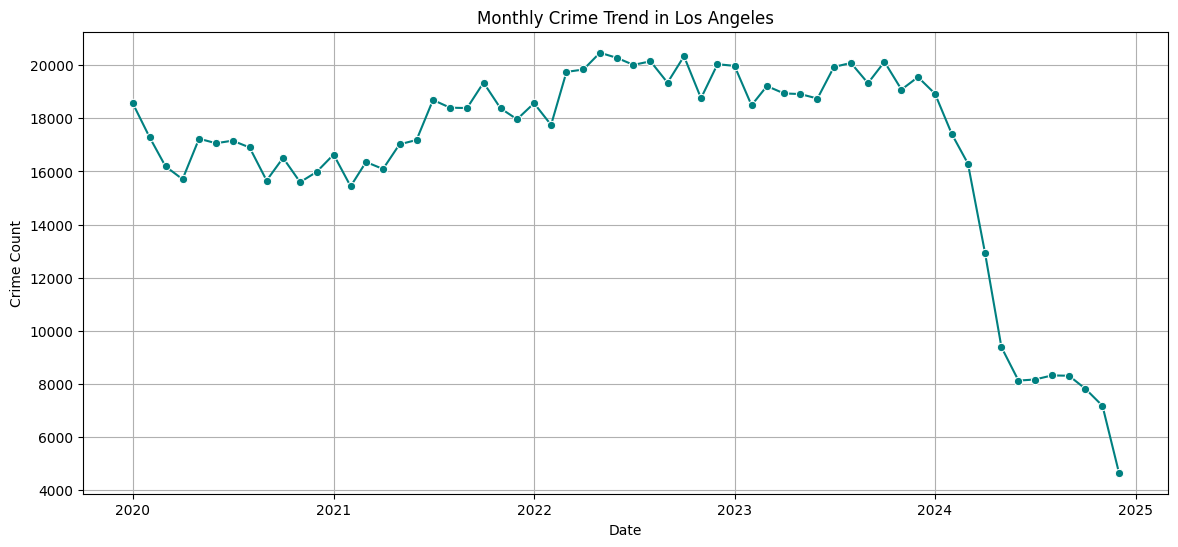

In [17]:
monthly_trend = crime_data.groupby(['Year', 'Month']).size().reset_index(name='Crime Count')
monthly_trend['Date'] = pd.to_datetime(monthly_trend[['Year', 'Month']].assign(DAY=1))

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_trend, x='Date', y='Crime Count', marker='o', color='teal')
plt.title('Monthly Crime Trend in Los Angeles')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.grid(True)
plt.show()
